# LINEAR RIDGE REGRESSION

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import linear_model as lm

## 1. Load Datasets

In [2]:
# Train Datasets
dataset_path = '../../datasets/regression/X_training.csv'
x_train = pd.read_csv(dataset_path)
dataset_path2 = '../../datasets/regression/y_training.csv'
y_train = pd.read_csv(dataset_path2)

# Test Datasets
dataset_path3 = '../../datasets/regression/X_test.csv'
x_test = pd.read_csv(dataset_path3)
dataset_path4 = '../../datasets/regression/y_test.csv'
y_test = pd.read_csv(dataset_path4)

# Validation Datasets
dataset_path5 = '../../datasets/regression/X_validation.csv'
x_val = pd.read_csv(dataset_path5)
dataset_path6 = '../../datasets/regression/y_val.csv'
y_val = pd.read_csv(dataset_path6)

## 2. Linear Ridge Regression

### 2.1 Fine Tunning

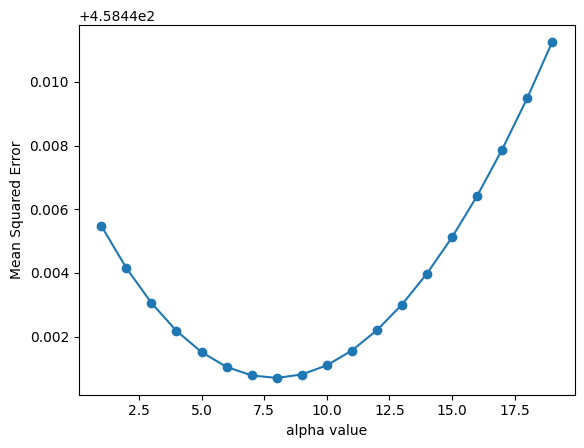

In [3]:
# Find Best alpha Hyperparameter for Validation Data
a = np.arange(1, 20, 1)
mse_list = []

for i in a:
    ridge = lm.Ridge(alpha=i, max_iter=1000)
    ridge.fit(x_train, y_train)    
    yhat_ridge = ridge.predict(x_val)

    mse = mt.mean_squared_error(y_val, yhat_ridge)
    mse_list.append(mse)

plt.plot(a, mse_list, '-o')
plt.xlabel('alpha value')
plt.ylabel('Mean Squared Error')
plt.show();

In [4]:
best_a = mse_list.index(min(mse_list))
a[best_a]

8

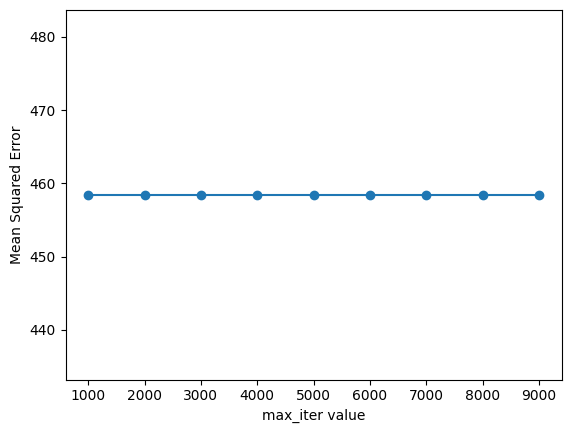

In [5]:
# Find Best max_iter Hyperparameter for Validation Data
m = np.arange(1000, 10000, 1000)
mse_list = []

for i in m:
    ridge = lm.Ridge(alpha=8, max_iter=i)
    ridge.fit(x_train, y_train)    
    yhat_ridge = ridge.predict(x_val)

    mse = mt.mean_squared_error(y_val, yhat_ridge)
    mse_list.append(mse)

plt.plot(m, mse_list, '-o')
plt.xlabel('max_iter value')
plt.ylabel('Mean Squared Error')
plt.show();

In [6]:
best_m = mse_list.index(min(mse_list))
m[best_m]

1000

### 2.2 Final Model Training and Evaluation

In [8]:
# Model Definition and Training
ridge = lm.Ridge(alpha=8, max_iter=1000)
ridge.fit(x_train, y_train)

Ridge(alpha=8, max_iter=1000)

In [9]:
# Predict Train with Best Hyperparameters Found
yhat_train = ridge.predict(x_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, yhat_train)
mse_train = mt.mean_squared_error(y_train, yhat_train)
rmse_train = np.sqrt(mse_train)
mae_train = mt.mean_absolute_error(y_train, yhat_train)
mape_train = mt.mean_absolute_percentage_error(y_train, yhat_train)

print(f"Train R2 Square: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}%")

Train R2 Square: 0.04602537123043404
Train MSE: 456.0118544539367
Train RMSE: 21.35443407009272
Train MAE: 16.99891234521389
Train MAPE: 8.654870560764696%


In [10]:
# Predict Validation with Best Hyperparameters Found
yhat_val = ridge.predict(x_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, yhat_val)
mse_val = mt.mean_squared_error(y_val, yhat_val)
rmse_val = np.sqrt(mse_val)
mae_val = mt.mean_absolute_error(y_val, yhat_val)
mape_val = mt.mean_absolute_percentage_error(y_val, yhat_val)

print(f"Validation R2 Square: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}%")

Validation R2 Square: 0.03993810419903976
Validation MSE: 458.4407034419404
Validation RMSE: 21.41122844308426
Validation MAE: 17.037961094116437
Validation MAPE: 8.681568144225453%


In [11]:
# Predict Test with Best Hyperparameters Found
yhat_test = ridge.predict(x_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, yhat_test)
mse_test = mt.mean_squared_error(y_test, yhat_test)
rmse_test = np.sqrt(mse_test)
mae_test = mt.mean_absolute_error(y_test, yhat_test)
mape_test = mt.mean_absolute_percentage_error(y_test, yhat_test)

print(f"Test R2 Square: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}%")

Test R2 Square: 0.052216805175176684
Test MSE: 461.4765624896012
Test RMSE: 21.48200555091636
Test MAE: 17.128431203347628
Test MAPE: 8.52901899778149%
